In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
# Importing the dataset
data= pd.read_csv("airline_passenger_satisfaction.csv")

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
data.shape

(129880, 24)

In [6]:
# Removing ID columns as it is not a important feature
data.drop(columns=['ID'], axis=1, inplace=True)

In [7]:
#Descriptive Analysis
data.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
# Checking Null values
data.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [9]:
data['Arrival Delay'] = data['Arrival Delay'].fillna(data['Arrival Delay'].mean())
data.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

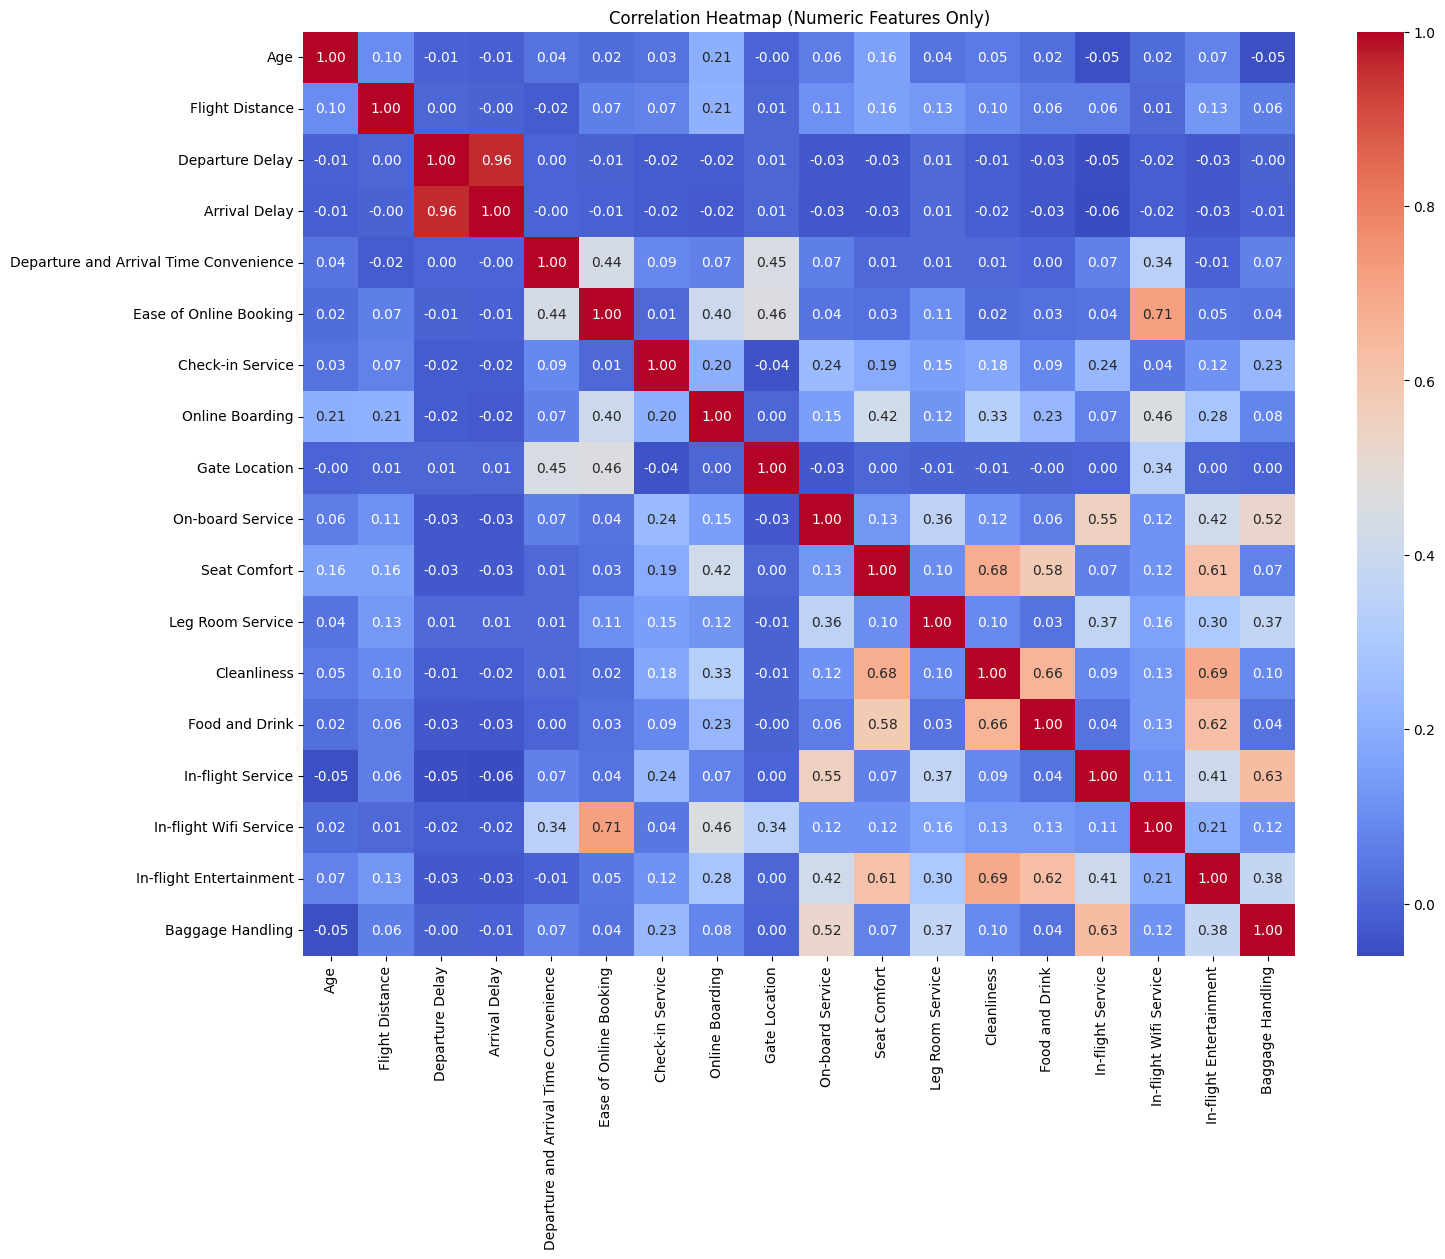

In [10]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [11]:
# Creating Correlation table
numeric_data.corr()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Age,1.000000,0.099459,-0.009041,-0.011229,0.036960,0.022565,0.033475,0.207572,-0.000398,0.057078,0.159136,0.039119,0.052565,0.023194,-0.051347,0.016116,0.074947,-0.047991
Flight Distance,0.099459,1.000000,0.002402,-0.001932,-0.018914,0.065165,0.073608,0.214825,0.005520,0.111194,0.157662,0.134533,0.095648,0.057066,0.059316,0.006701,0.130507,0.064855
Departure Delay,-0.009041,0.002402,1.000000,0.960329,0.000778,-0.005318,-0.018752,-0.019404,0.005973,-0.030486,-0.027999,0.014574,-0.014543,-0.029164,-0.054432,-0.015946,-0.027012,-0.004105
Arrival Delay,-0.011229,-0.001932,0.960329,1.000000,-0.000941,-0.007022,-0.021671,-0.022694,0.005649,-0.034735,-0.030472,0.011327,-0.016520,-0.031666,-0.059759,-0.017721,-0.030187,-0.007923
Departure and Arrival Time Convenience,0.036960,-0.018914,0.000778,-0.000941,1.000000,0.437620,0.091132,0.072287,0.447510,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833
Ease of Online Booking,0.022565,0.065165,-0.005318,-0.007022,0.437620,1.000000,0.008819,0.404866,0.460041,0.039064,0.028561,0.109450,0.015125,0.030514,0.035373,0.714807,0.046564,0.039148
Check-in Service,0.033475,0.073608,-0.018752,-0.021671,0.091132,0.008819,1.000000,0.204238,-0.039353,0.244619,0.189979,0.152693,0.176658,0.085198,0.237601,0.043762,0.119554,0.234503
Online Boarding,0.207572,0.214825,-0.019404,-0.022694,0.072287,0.404866,0.204238,1.000000,0.002756,0.154242,0.419253,0.123225,0.329377,0.233500,0.074058,0.457445,0.283922,0.083541
Gate Location,-0.000398,0.005520,0.005973,0.005649,0.447510,0.460041,-0.039353,0.002756,1.000000,-0.029019,0.002788,-0.005181,-0.005918,-0.002872,0.000310,0.338573,0.002741,0.000972
On-board Service,0.057078,0.111194,-0.030486,-0.034735,0.067297,0.039064,0.244619,0.154242,-0.029019,1.000000,0.130545,0.357721,0.122084,0.057404,0.551569,0.119928,0.418574,0.520296


<Figure size 1000x600 with 0 Axes>

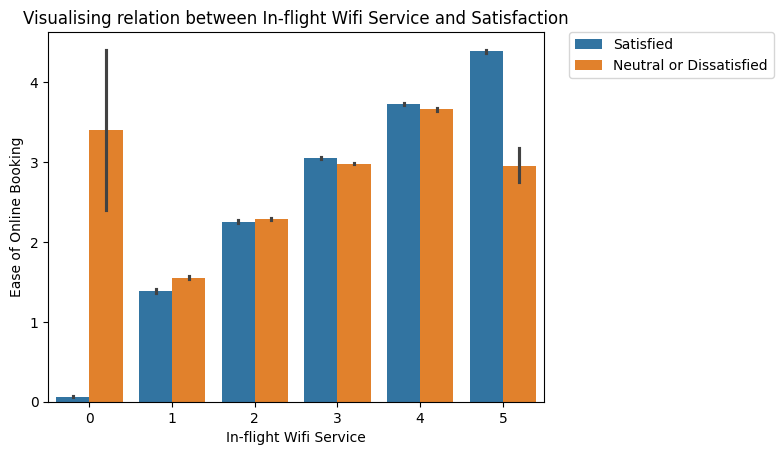

<Figure size 1000x600 with 0 Axes>

In [12]:
# Visualising relation between In-flight Wifi Service and Satisfaction
sns.barplot(x = 'In-flight Wifi Service',
            y = 'Ease of Online Booking',
            hue='Satisfaction',
            data = data)
plt.title("Visualising relation between In-flight Wifi Service and Satisfaction")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)
plt.figure(figsize=(10, 6))

C:\Users\Saksham Srivastava\AppData\Local\Temp\ipykernel_10904\2516361316.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)


<Figure size 1000x600 with 0 Axes>

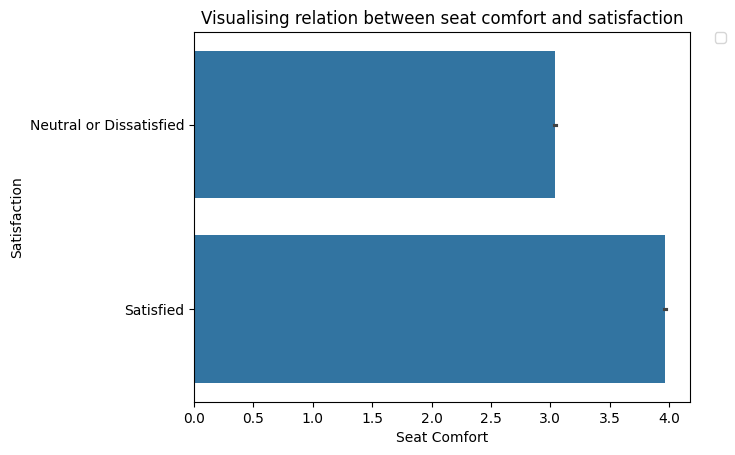

<Figure size 1000x600 with 0 Axes>

In [13]:
#Visualising relation between seat comfort and satisfaction
sns.barplot(x = 'Seat Comfort',
            y = 'Satisfaction',
            data = data)
plt.title("Visualising relation between seat comfort and satisfaction")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)
plt.figure(figsize=(10, 6))

C:\Users\Saksham Srivastava\AppData\Local\Temp\ipykernel_10904\623813522.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)


<Figure size 1000x600 with 0 Axes>

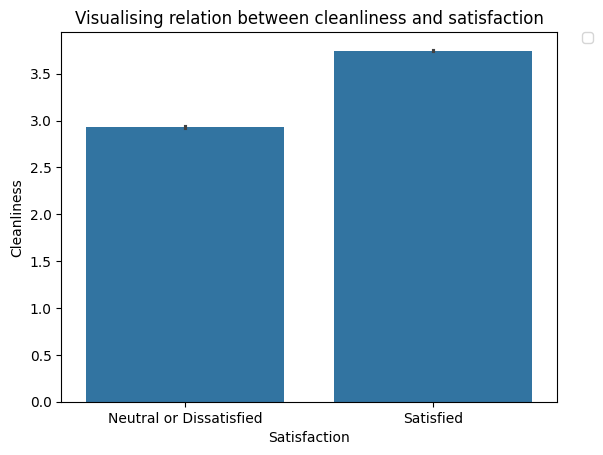

<Figure size 1000x600 with 0 Axes>

In [14]:
# Visualising relation between cleanliness and satisfaction
sns.barplot(x = 'Satisfaction',
            y = 'Cleanliness',
            data = data)
plt.title("Visualising relation between cleanliness and satisfaction")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)
plt.figure(figsize=(10, 6))

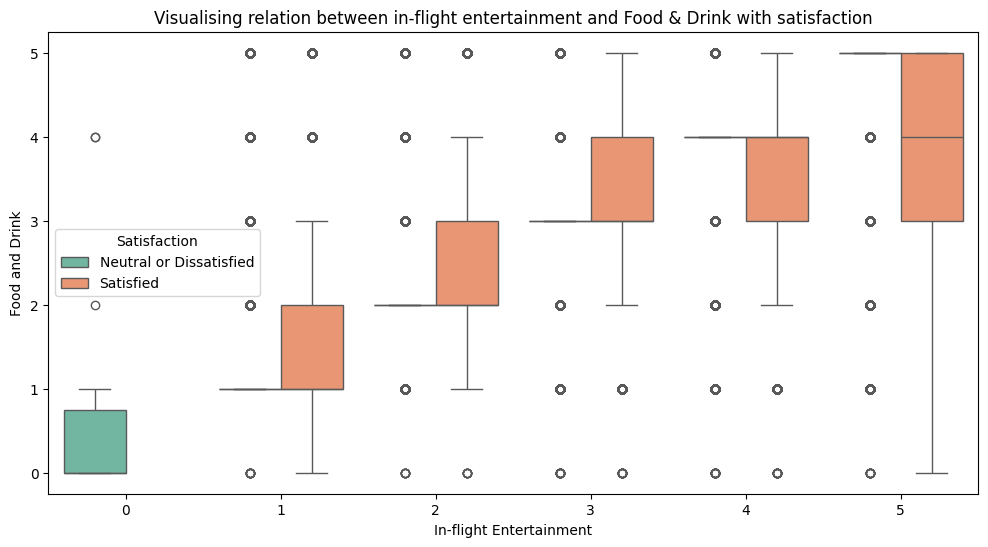

<Figure size 1000x600 with 0 Axes>

In [15]:
# Visualising relation between in-flight entertainment and Food & Drink with satisfaction
plt.figure(figsize=(12, 6))
sns.boxplot(x='In-flight Entertainment', y='Food and Drink', hue='Satisfaction', data=data, palette='Set2')
plt.title('Visualising relation between in-flight entertainment and Food & Drink with satisfaction')

plt.figure(figsize=(10, 6))

plt.show()

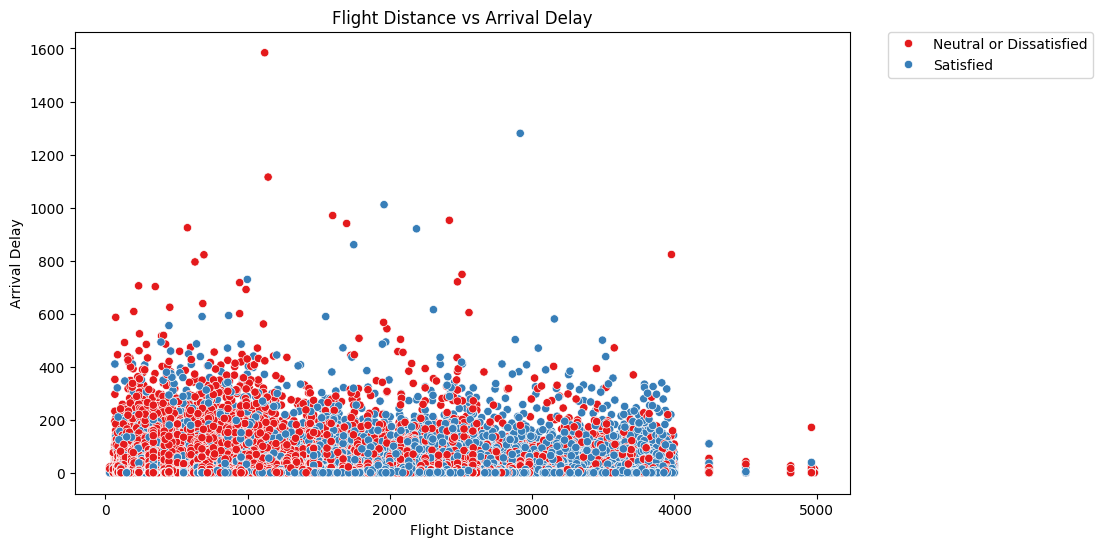

In [16]:
# Scatterplot between Flight Distance vs Departure and Arrival Time Convenience
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight Distance', y='Arrival Delay', hue='Satisfaction', data=data, palette='Set1')
plt.title('Flight Distance vs Arrival Delay')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

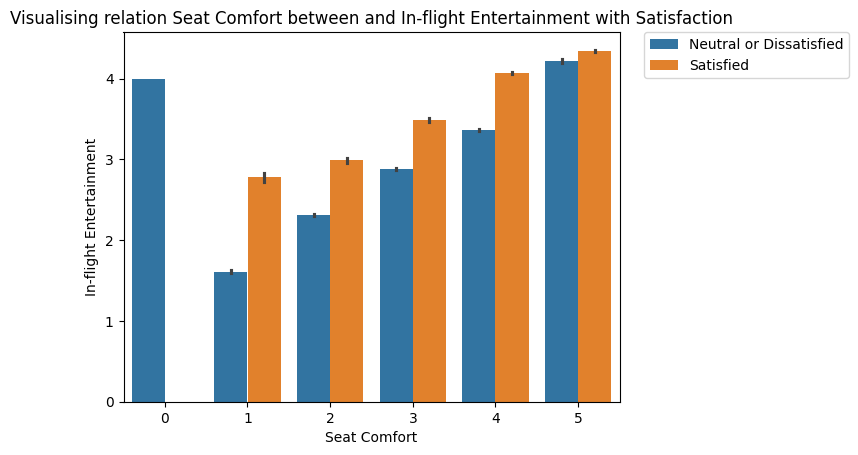

<Figure size 1000x600 with 0 Axes>

In [17]:
# Visualising relation between In-flight Entertainment and Satisfaction
sns.barplot(x = 'Seat Comfort',
            y = 'In-flight Entertainment',
            hue='Satisfaction',
            data = data)
plt.title("Visualising relation Seat Comfort between and In-flight Entertainment with Satisfaction")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)
plt.figure(figsize=(10, 6))

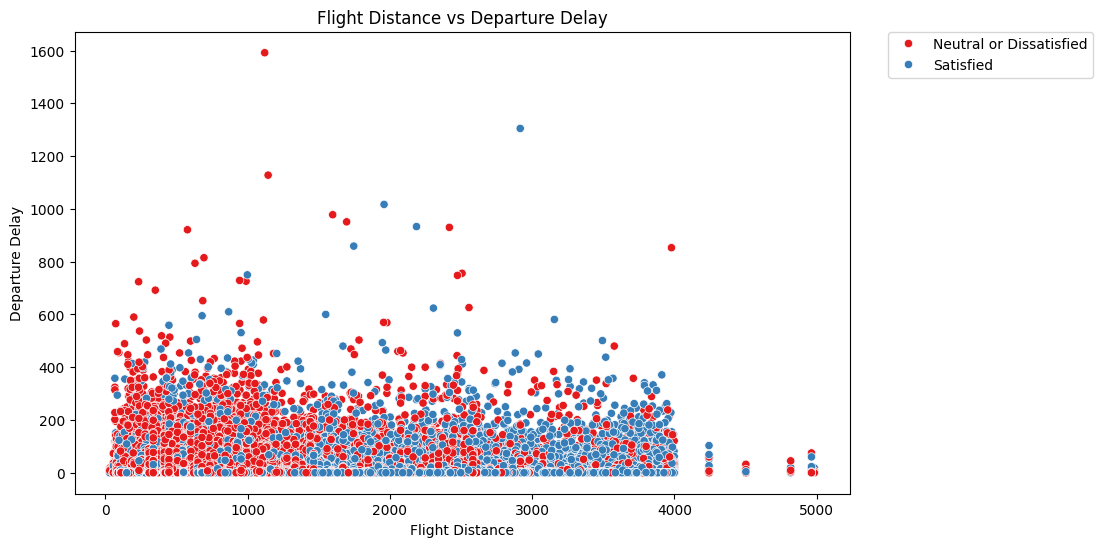

In [18]:
# Scatterplot between Flight Distance vs Departure and Departure Delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight Distance', y='Departure Delay', hue='Satisfaction', data=data, palette='Set1')
plt.title('Flight Distance vs Departure Delay')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0)
plt.show()

In [19]:
#feature Selection
X=numeric_data
y= pd.DataFrame(data, columns=['Satisfaction'])

    


In [20]:
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 

KNN Classification Model Training

In [21]:

knn = KNeighborsClassifier(n_neighbors=7) 
  
knn.fit(X_train, y_train) 
  
# Predict on dataset which model has not seen before 
Knn_predictions=knn.predict(X_test) 
print(Knn_predictions)

c:\Users\Saksham Srivastava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


['Neutral or Dissatisfied' 'Neutral or Dissatisfied'
 'Neutral or Dissatisfied' ... 'Satisfied' 'Neutral or Dissatisfied'
 'Satisfied']


In [22]:
# Performance Evaluation of KNN
accuracy = accuracy_score(y_test, Knn_predictions)
classification_rep = classification_report(y_test, Knn_predictions)
print("Accuracy:",accuracy)
print("Classification report: \n",classification_rep)

Accuracy: 0.7424545734524176
Classification report: 
                          precision    recall  f1-score   support

Neutral or Dissatisfied       0.75      0.81      0.78     14723
              Satisfied       0.73      0.65      0.69     11253

               accuracy                           0.74     25976
              macro avg       0.74      0.73      0.73     25976
           weighted avg       0.74      0.74      0.74     25976



[[11948  2775]
 [ 3915  7338]]


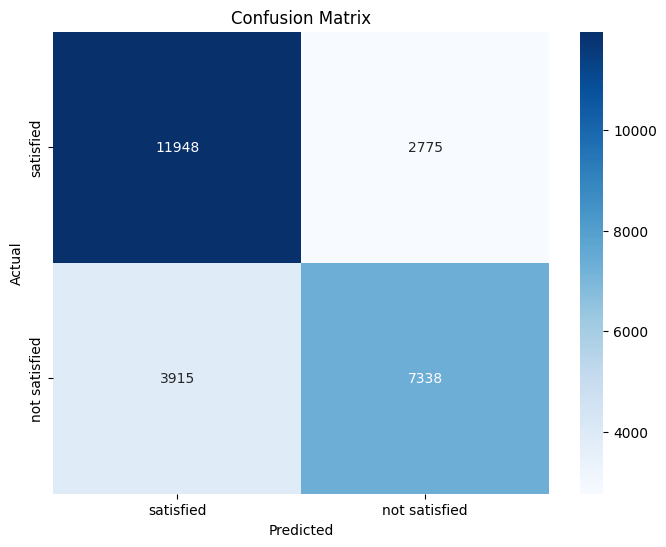

In [23]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, Knn_predictions)
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['satisfied', 'not satisfied'], yticklabels=['satisfied', 'not satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree Model training



In [24]:
#fitting the model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [25]:
# making predictions
predictions= clf.predict(X_test)
print(predictions)

['Neutral or Dissatisfied' 'Satisfied' 'Satisfied' ... 'Satisfied'
 'Neutral or Dissatisfied' 'Satisfied']


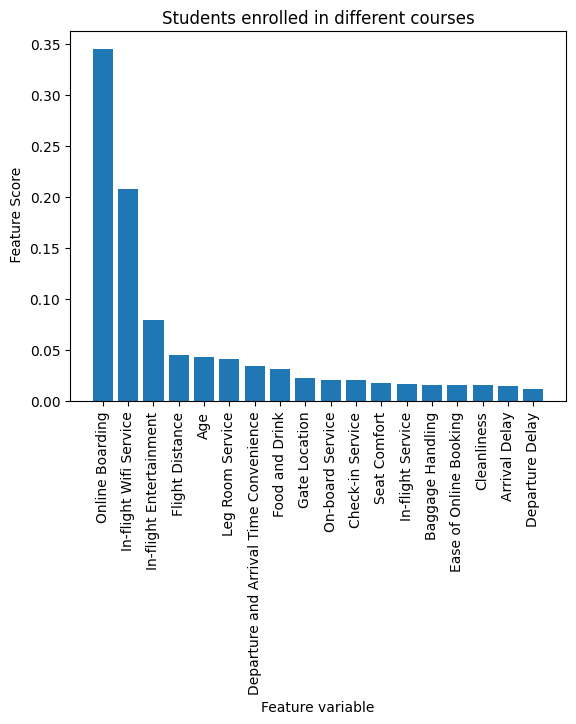

In [26]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores
plt.bar(feature_scores.index, feature_scores)
plt.xlabel("Feature variable")
plt.ylabel(" Feature Score")
plt.title("Students enrolled in different courses")
plt.xticks(rotation=90)
plt.show()

In [27]:
# Performance Evaluation of Decision Tree model
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
print("Accuracy:",accuracy)
print("Classification report: \n",classification_rep)

Accuracy: 0.9225438866646135
Classification report: 
                          precision    recall  f1-score   support

Neutral or Dissatisfied       0.93      0.93      0.93     14723
              Satisfied       0.91      0.92      0.91     11253

               accuracy                           0.92     25976
              macro avg       0.92      0.92      0.92     25976
           weighted avg       0.92      0.92      0.92     25976



[[13665  1058]
 [  954 10299]]


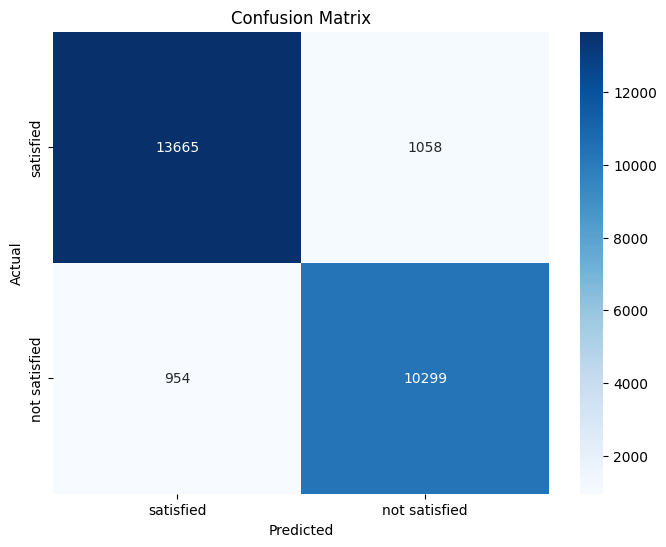

In [28]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['satisfied', 'not satisfied'], yticklabels=['satisfied', 'not satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random forest model Training

In [29]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
print("predictions:",y_pred)


c:\Users\Saksham Srivastava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


predictions: ['Neutral or Dissatisfied' 'Satisfied' 'Satisfied' ... 'Satisfied'
 'Neutral or Dissatisfied' 'Satisfied']


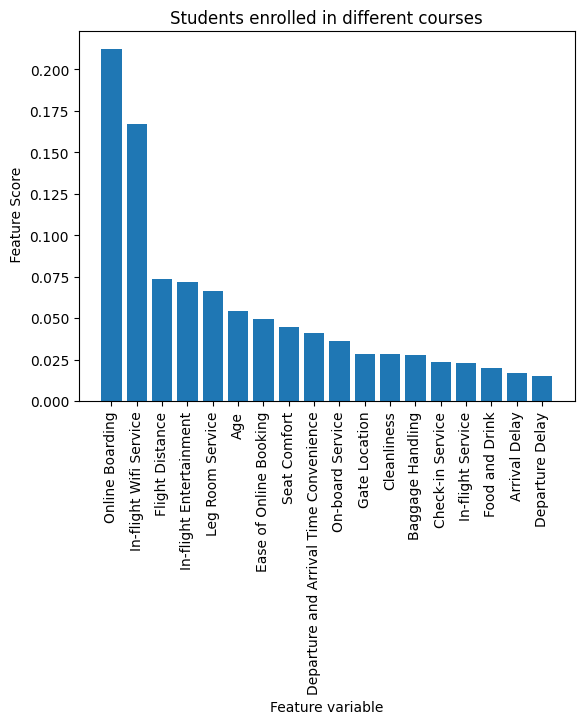

In [30]:
# view the feature scores

feature_scores = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores
plt.bar(feature_scores.index, feature_scores)
plt.xlabel("Feature variable")
plt.ylabel(" Feature Score")
plt.title("Students enrolled in different courses")
plt.xticks(rotation=90)
plt.show()

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:",accuracy)
print("Classification report: \n",classification_rep)


Accuracy: 0.949299353249153
Classification report: 
                          precision    recall  f1-score   support

Neutral or Dissatisfied       0.94      0.97      0.96     14723
              Satisfied       0.96      0.92      0.94     11253

               accuracy                           0.95     25976
              macro avg       0.95      0.95      0.95     25976
           weighted avg       0.95      0.95      0.95     25976



[[14266   457]
 [  860 10393]]


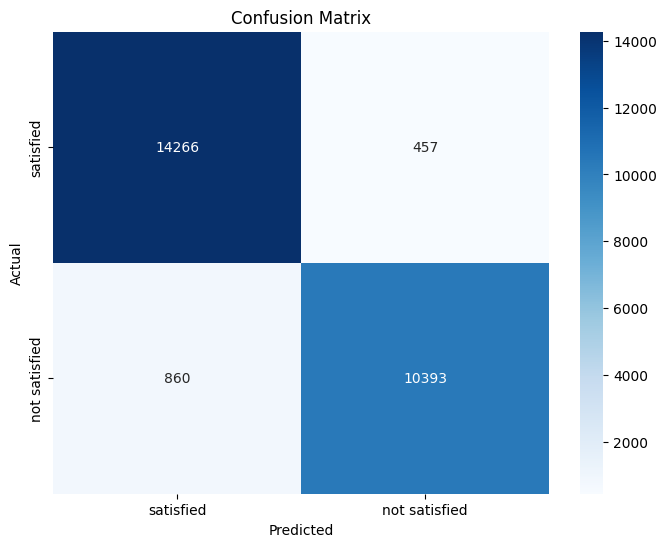

In [32]:
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['satisfied', 'not satisfied'], yticklabels=['satisfied', 'not satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()